In [25]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

from PIL import Image

random.seed(42)

CLUE_DATA = {
        'common': [
            "Someone draws a gun",
            "Mulder’s family member is mentioned",
            "Mulder or Scully use a flashlight",
            "Scully witnesses something paranormal and disregards it",
            "Someone is in the hospital",
            "Scully or Mulder are called into the boss’s office",
            "“Stop! Federal agents!” is said",
            "Someone is abducted or an abduction is mentioned",
            "Someone dies on screen",
            "Scully and Mulder visit a small, forested town",
            "Mulder is missing the entire episode",
        ],
        'uncommon': [
            "Mulder or Scully punch someone",
            "Mulder makes a sex joke",
            "Scully makes a face when performing an autopsy",
            "Scully saves Mulder",
            "We see legitimate UFO evidence",
            "Scully or Mulder tamper with an active crime scene",
            "Someone calls Mulder “spooky”",
            "The local police force are uncooperative or skeptical",
            "The local police force are supportive",
            "The monster of the week eats people",
            "The black goo is on screen (including in eyes)",
            "Mulder or Scully encounter the military",
            "Mulder or Scully encounter an infectious “disease”",
            "Scully’s dog, Queequeg, is mentioned or visible",
            "Children are involved in the weirdness",
            "Scully is missing the entire episode",
            "Christmas or Halloween themed episode",
            "Native American Culture/People mentioned or seen",
            "The Smoking Man appears",
            "The Lone Gunmen appear",
            "Scully gets kidnapped",
            "A psychic or other “mind powers” individual is present",
            "The episode theme is something “high tech”",
        ],
        'rare': [
            "The I Want to Believe poster is visible",
            "Mulder and Scully have sexual tension",
            "Something is written in blood",
            "Monster: Demon (not Devil) (multiple seasons)",
            "Monster: Ghost (multiple seasons)",
            "Monster: Bugs (multiple seasons)",
            "Monster: Eugene Tooms (S01)",
            "Monster: Flukeman (S02)",
            "Monster: Lake/Water Monster (Big Blue; S03)",
            "Monster: Chupacabra (S04)",
            "Monster: The Great Mutato (S05)",
            "Monster: Vampire (S05)",
            "Monster: Nazis (S06)",
            "Monster: Zombie (S07)",
            "Monster: Human Bat (S08)",
            "Monster: Universe Hopper (Erwin Lukesh; S09)",
            "Monster: Bandaid Nose Man (S010)",
        ],
    }

def generate_card(save_loc=None, display=True):
    global CLUE_DATA
    data = CLUE_DATA
    plt.rcParams['figure.facecolor'] = (0, 0, 0, 0)
    mpl.rcParams['figure.dpi'] = 300

    plt.scatter([0, 0, 5, 5], [0, 5, 0, 5], alpha=0)
    plt.gca().set_axis_off()
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(8.5, 8.5)

    # R - rare
    # U - uncommon
    # C - common
    # F - free
    # X - any
    # Y - uncommon or common
    # Z - rare or uncommon
    # Q - rare or common
    layout = [
        ['Z', 'U', 'C', 'U', 'R'],
        ['U', 'Y', 'X', 'Y', 'U'],
        ['C', 'X', 'F', 'X', 'C'],
        ['U', 'Y', 'X', 'Y', 'U'],
        ['R', 'U', 'C', 'U', 'Z'],
    ]

    def select_clue(category, clue_data, existing, max_retries=100):
        selection = ''
        retries = 0
        pick_one = lambda l: random.sample(l, 1)
        while (selection == '' or selection in existing) and retries < max_retries:
            retries += 1
            if category == "C":
                selection = pick_one(clue_data['common'])
            if category == "U":
                selection = pick_one(clue_data['uncommon'])
            if category == "R":
                selection = pick_one(clue_data['rare'])
            if category == "F":
                selection = ["Free"]
            if category == "X":
                selection = pick_one(clue_data['common'] + clue_data['uncommon'] + clue_data['rare'])
            if category == "Y":
                selection = pick_one(clue_data['common'] + clue_data['uncommon'])
            if category == "Z":
                selection = pick_one(clue_data['rare']) + clue_data['uncommon']
            if category == "Q":
                selection = pick_one(clue_data['common'])
        difficulty = 0
        selection = selection[0]
        if selection in clue_data['common']:
            difficulty = 1
        elif selection in clue_data['uncommon']:
            difficulty = 3
        elif selection in clue_data['rare']:
            difficulty = 5
        return selection, difficulty

    im = Image.open('ufo.jpg')
    offset = -2.2
    plt.gca().imshow(im, origin='upper', aspect="equal", extent=(0.0+offset, 5.0-offset, -1.2+offset, 5.8-offset))
    existing_clues = []
    total_difficulty = 0
    for x in range(5):
        for y in range(5):
            clue, difficulty = select_clue(layout[x][y], data, existing_clues)
            if existing_clues != 'Free':
                existing_clues.append(clue)
            total_difficulty += difficulty
            rect = patches.Rectangle((x, y),1, 1, linewidth=1, edgecolor='black', facecolor=(1, 1, 1, 0.8))
            plt.gca().add_patch(rect)
            t = plt.text(x+0.5, y+0.5, clue, fontsize=5,
                        horizontalalignment='center',
                        verticalalignment='center', wrap=True, color="black")
            difficulty_reverse_lut = {0: "", 1: "C", 3: "U", 5: "R"}
            plt.text(x+0.95, y+0.05, difficulty_reverse_lut[difficulty], fontsize=5,
                        horizontalalignment='right',
                        verticalalignment='bottom', wrap=True, color="black")
            t._get_wrap_line_width = lambda : 160
    plt.text(-2, -3.2, 
            f"C - Common, U - Uncommon, R - Rare | Card Difficulty - {total_difficulty}", fontsize=5,
                        horizontalalignment='left',
                        verticalalignment='center', wrap=True, color="white")
    
    if save_loc:
        plt.savefig(save_loc, bbox_inches='tight', pad_inches=0)
    if display:
        plt.show()
    return existing_clues

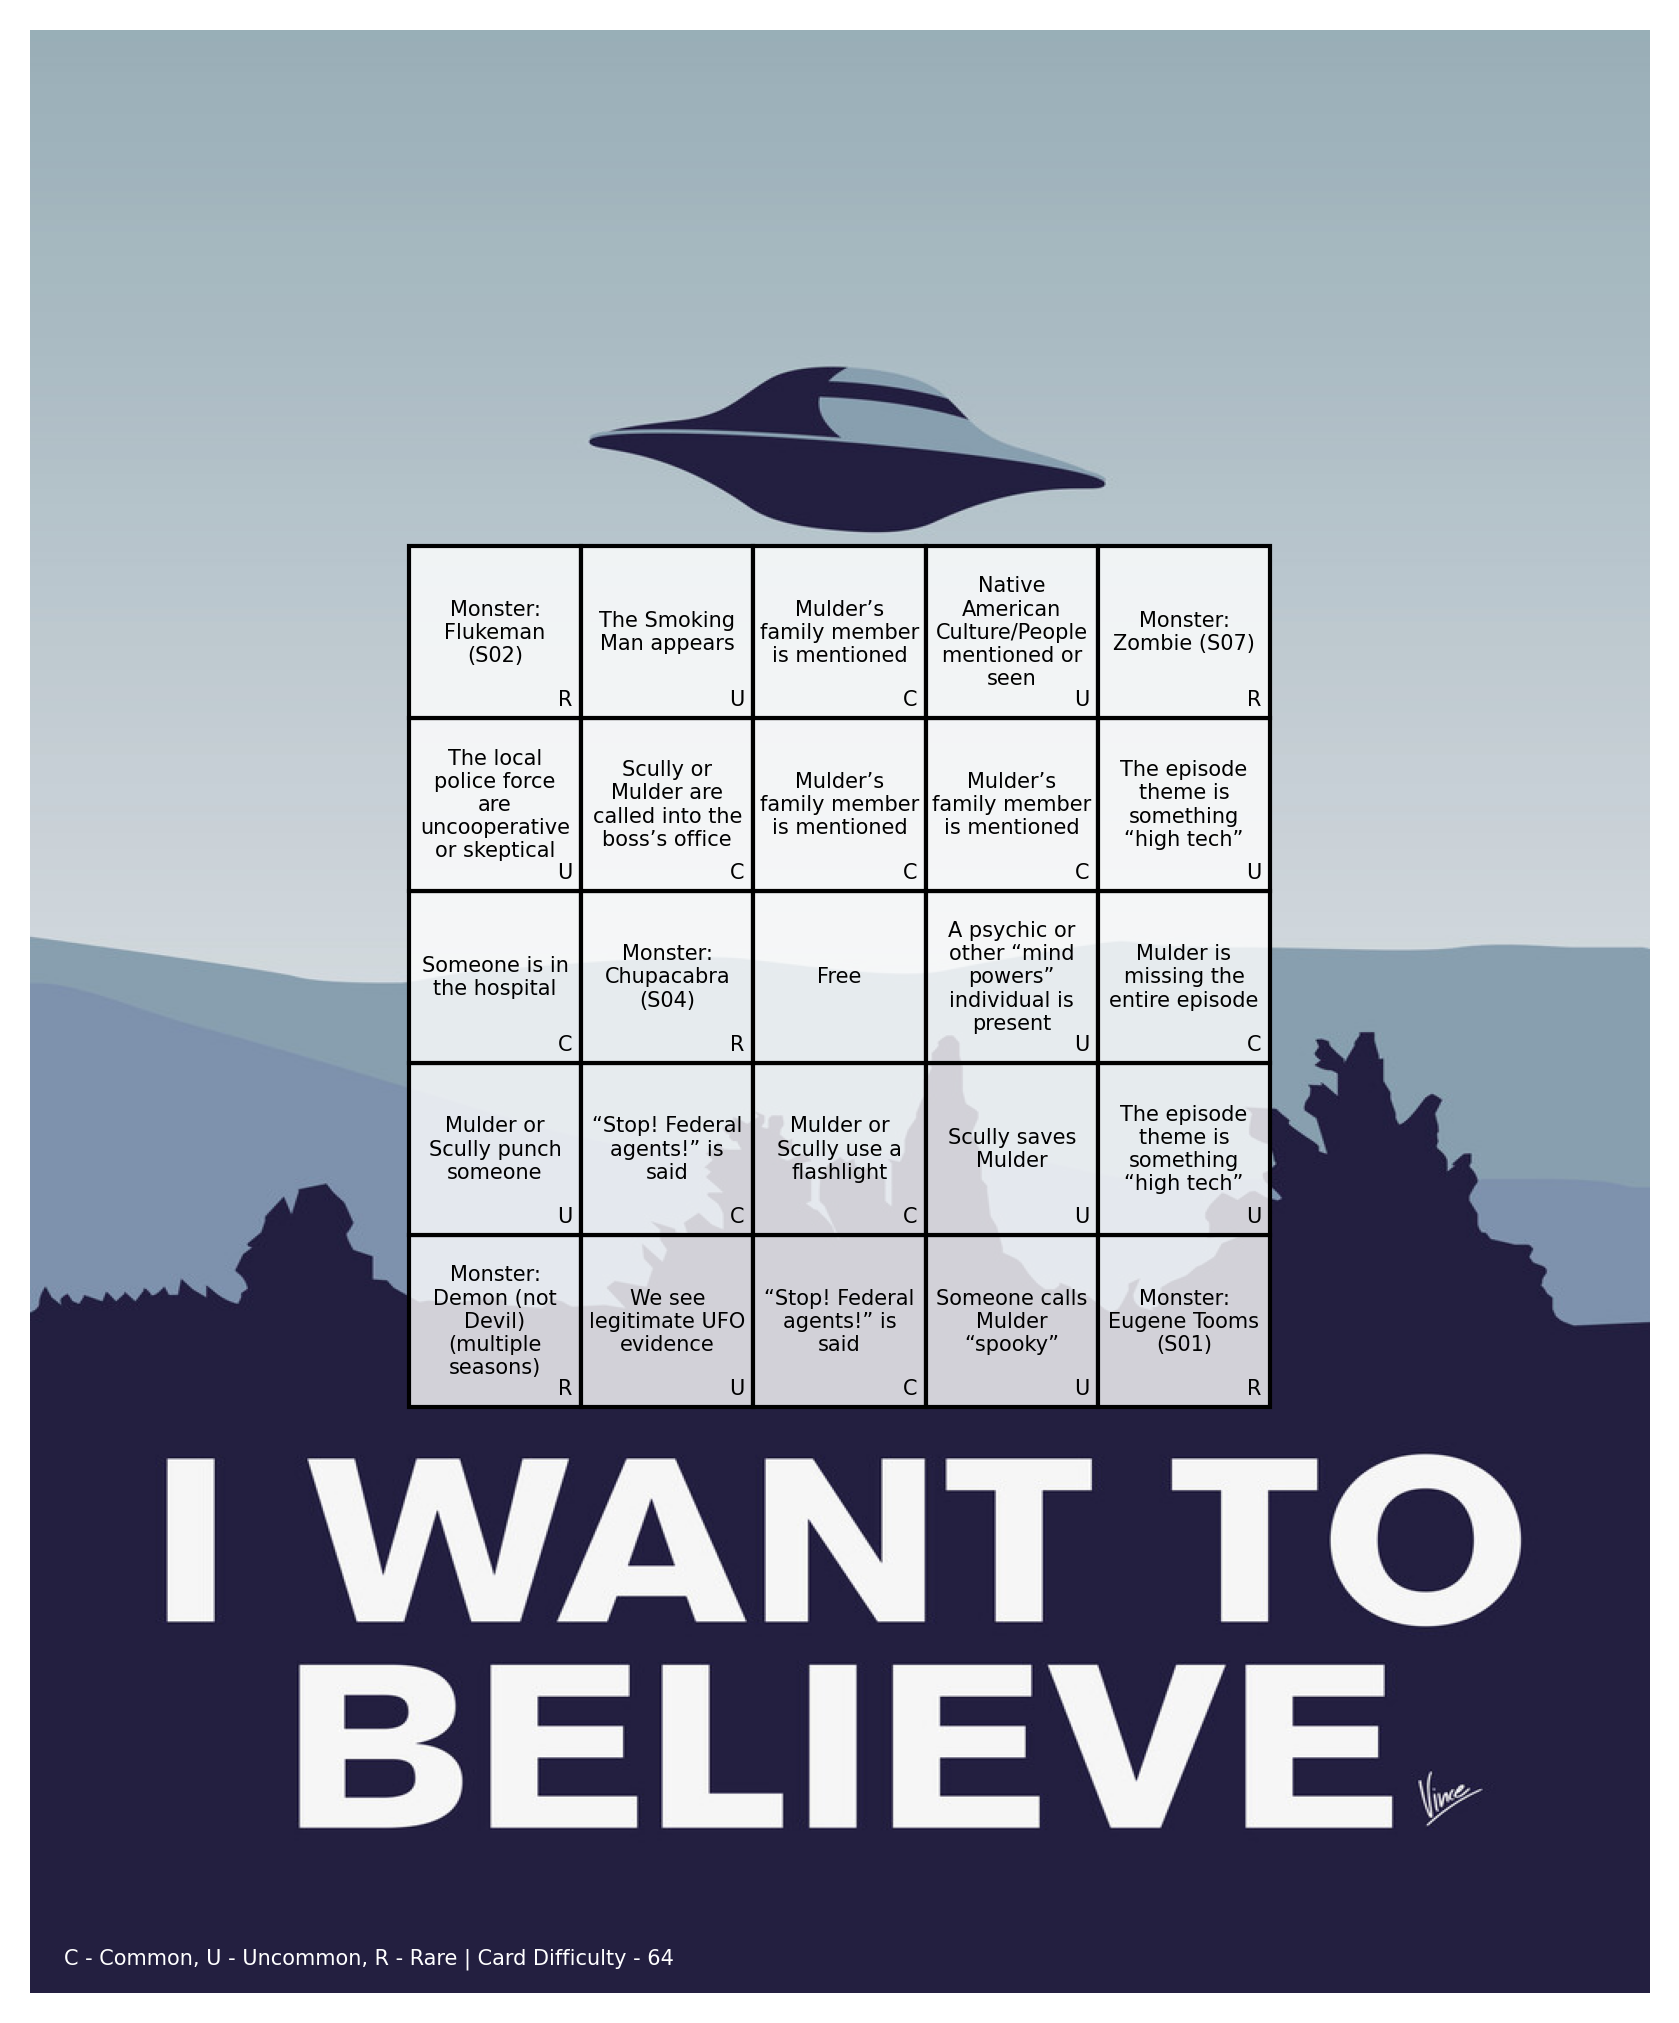

['Monster: Demon (not Devil) (multiple seasons)',
 'Mulder or Scully punch someone',
 'Someone is in the hospital',
 'The local police force are uncooperative or skeptical',
 'Monster: Flukeman (S02)',
 'We see legitimate UFO evidence',
 '“Stop! Federal agents!” is said',
 'Monster: Chupacabra (S04)',
 'Scully or Mulder are called into the boss’s office',
 'The Smoking Man appears',
 '“Stop! Federal agents!” is said',
 'Mulder or Scully use a flashlight',
 'Free',
 'Mulder’s family member is mentioned',
 'Mulder’s family member is mentioned',
 'Someone calls Mulder “spooky”',
 'Scully saves Mulder',
 'A psychic or other “mind powers” individual is present',
 'Mulder’s family member is mentioned',
 'Native American Culture/People mentioned or seen',
 'Monster: Eugene Tooms (S01)',
 'The episode theme is something “high tech”',
 'Mulder is missing the entire episode',
 'The episode theme is something “high tech”',
 'Monster: Zombie (S07)']

In [26]:
generate_card(display=True, save_loc="test.png")

  0%|          | 0/20 [00:00<?, ?it/s]

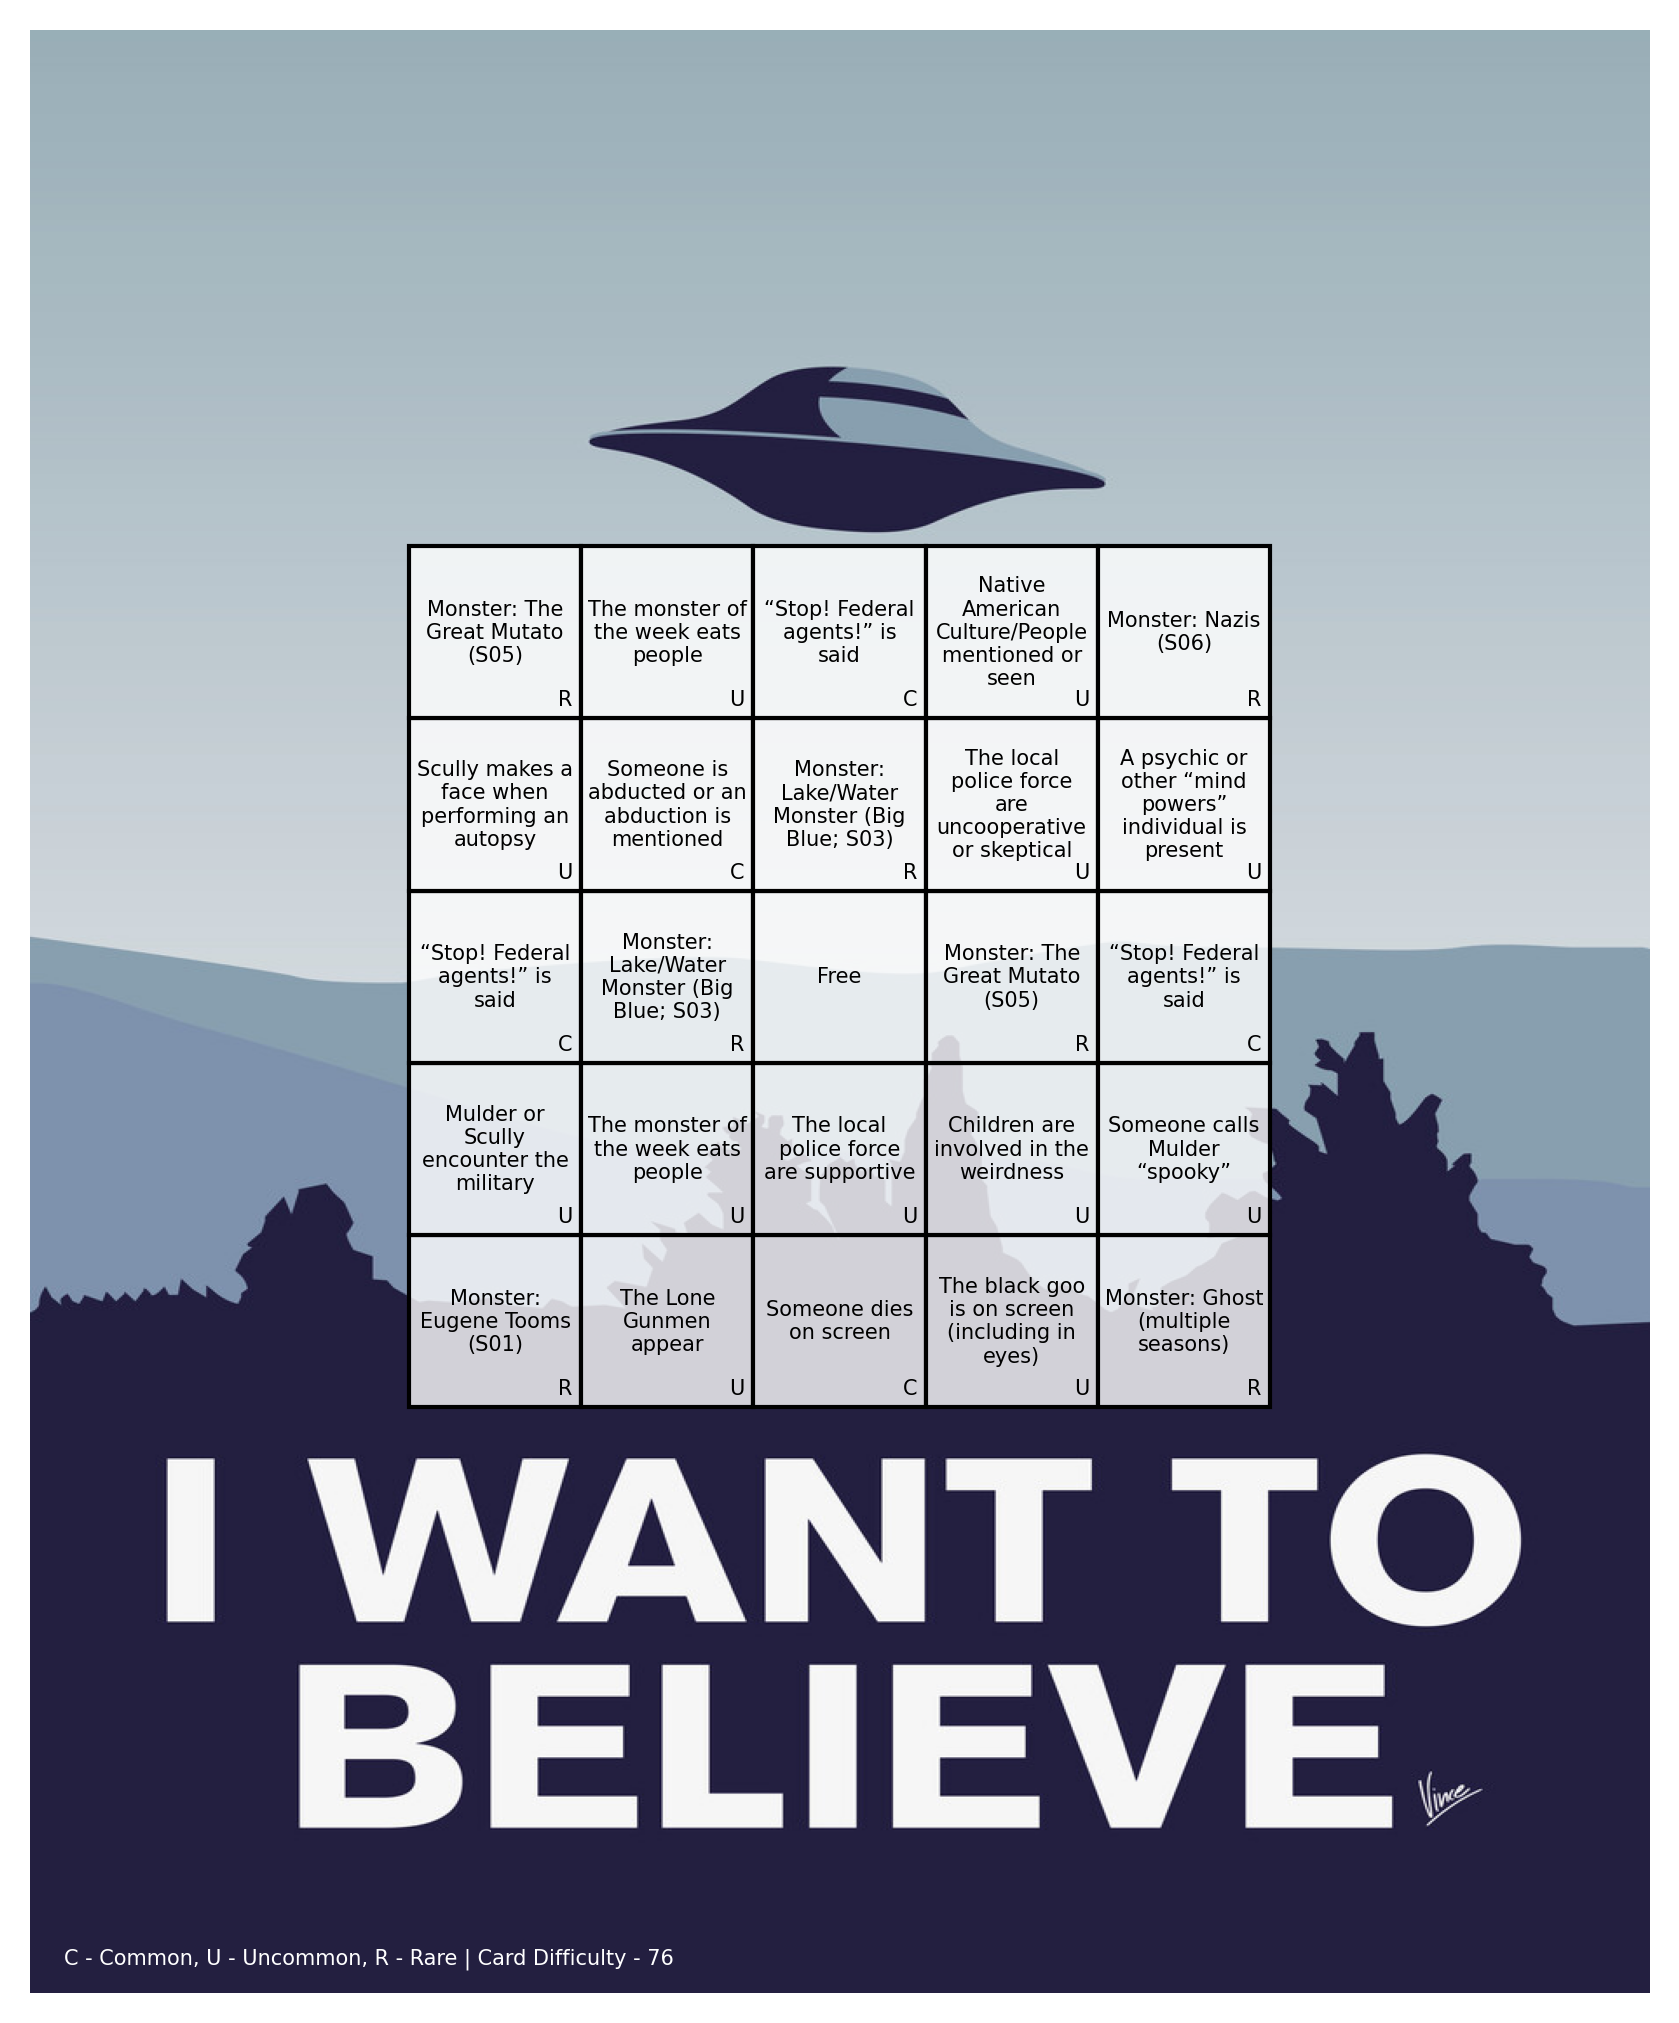

In [27]:
from tqdm.auto import tqdm
clues = []
flat_clues = [x for xs in [CLUE_DATA[x] for x in CLUE_DATA] for x in xs]
for i in tqdm(list(range(20))):
    plt.clf()
    clues.append(generate_card(display=False, save_loc=f"./cards/{i}.png"))
plt.clf()

In [29]:
all_used = [x for xs in clues for x in xs]
for fc in flat_clues:
    if fc not in all_used:
        print(fc)